In [25]:
#importing models
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import warnings
from matplotlib import rcParams
#importing sklearn models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from path import Path

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
# defining data path
data_path=Path('../0.resources/Cleaned_folder/aqi_asthma.csv')

#data_path=Path('resources/Cleaned_folder/aqi_asthma_try.csv')

# Reading data source using pandas
asthma_df=pd.read_csv(data_path)

In [28]:
asthma_df.columns

Index(['Year', 'Age_Group', 'county', 'Number_of_Asthma_ED_Visits',
       'Age_Adjusted_Rate_of_Asthma_ED_V', 'NO2 AQI_mean', 'NO2 AQI_max',
       'NO2 AQI_min', 'O3 AQI_mean', 'O3 AQI_max', 'O3 AQI_min',
       'SO2 AQI_mean', 'SO2 AQI_max', 'SO2 AQI_min', 'CO AQI_mean',
       'CO AQI_max', 'CO AQI_min'],
      dtype='object')

In [29]:
asthma_df

,Year,Age_Group,county,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,NO2 AQI_mean,NO2 AQI_max,NO2 AQI_min,O3 AQI_mean,O3 AQI_max,O3 AQI_min,SO2 AQI_mean,SO2 AQI_max,SO2 AQI_min,CO AQI_mean,CO AQI_max,CO AQI_min
0,2013,0,Alameda,144.630435,55.506522,25.151099,61.000000,5.0,21.027473,50.0,3.0,2.491758,67.000000,0.0,8.043956,36.000000,2.0
1,2013,1,Alameda,82.384615,100.317949,25.151099,61.000000,5.0,21.027473,50.0,3.0,2.491758,67.000000,0.0,8.043956,36.000000,2.0
2,2013,0,Contra costa,129.000000,48.694444,15.813699,34.666667,3.0,29.459817,78.0,9.0,1.209132,6.666667,0.0,4.422831,9.666667,2.0
3,2013,1,Contra costa,76.482759,82.317241,15.813699,34.666667,3.0,29.459817,78.0,9.0,1.209132,6.666667,0.0,4.422831,9.666667,2.0
4,2013,0,Fresno,92.000000,55.602778,23.650000,57.000000,3.0,44.755556,145.0,3.0,0.877778,7.000000,0.0,7.325000,26.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2016,1,Santa barbara,63.500000,78.070000,4.106227,10.333333,0.0,39.021978,74.0,24.0,0.846154,2.333333,0.0,1.793040,4.000000,0.0
100,2016,0,Santa clara,80.688889,25.424444,23.355372,48.000000,4.0,30.454545,67.0,6.0,0.190083,1.000000,0.0,6.016529,15.000000,2.0
101,2016,1,Santa clara,40.657895,35.697368,23.355372,48.000000,4.0,30.454545,67.0,6.0,0.190083,1.000000,0.0,6.016529,15.000000,2.0
102,2016,0,Solano,205.000000,70.781818,17.851240,36.000000,1.0,31.545455,84.0,6.0,0.950413,9.000000,0.0,6.801653,20.000000,2.0


In [30]:
asthma_df_O3.to_html('asthma2.html')

In [34]:
asthma_df_O3=asthma_df[['Year','Age_Group', 'county', 'Number_of_Asthma_ED_Visits',
       'Age_Adjusted_Rate_of_Asthma_ED_V',  'O3 AQI_mean', 'O3 AQI_max', 'O3 AQI_min',]]

In [35]:
asthma_df_O3.dtypes

Year                                  int64
Age_Group                             int64
county                               object
Number_of_Asthma_ED_Visits          float64
Age_Adjusted_Rate_of_Asthma_ED_V    float64
O3 AQI_mean                         float64
O3 AQI_max                          float64
O3 AQI_min                          float64
dtype: object

In [36]:
# create feature matrix (X)
#selecting all columns except 'Age-adjusted-rate'
X=asthma_df_O3.drop(['Age_Adjusted_Rate_of_Asthma_ED_V','Number_of_Asthma_ED_Visits','Year','county'], axis=1) 

#X=asthma_df.drop(['Age-adjusted rate','county'], axis=1)

# create response vector (y)
##selecting 'Age-adjusted-rate'
y=asthma_df_O3['Age_Adjusted_Rate_of_Asthma_ED_V'].values

#y=asthma_df['Age-adjusted rate'].values

#### Splitting data in train and test set

In [37]:
#Training set**: Used to train the classifier.
#Testing set**: Used to estimate the error rate of the trained classifier.
#Also using train_index and test_index to get train and test data index 
X_train, X_test, y_train, y_test = train_test_split(
                               X, y, test_size=0.2, random_state=42)

In [38]:
print(f'Shape of X_train={X_train.shape}')
print(f'Shape of X_test={X_test.shape}')
print(f'Shape of y_train={y_train.shape}')
print(f'Shape of X_test={y_test.shape}')

Shape of X_train=(83, 4)
Shape of X_test=(21, 4)
Shape of y_train=(83,)
Shape of X_test=(21,)


#### Scaling using standard scaler on feature matrix (X) 

In [39]:
#Different columns have differnt scale so standrazied it 
#features scaling using standard scaler on x only
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
scaled_X_train=std_scaler.fit_transform(X_train)
scaled_X_test=std_scaler.transform(X_test)

In [40]:
#shape of the X and y
print(scaled_X_train.shape)
print(y.shape)

(83, 4)
(104,)


### Evaluation Metric

To evaluate a model, we also need an **evaluation metric:**

- A numeric calculation used to **quantify** the performance of a model.
- The appropriate metric depends on the **goals** of your problem.

The most common choices for regression problems are:

- **R-squared**: The percentage of variation explained by the model (a "reward function," as higher is better).
- **Mean squared error**: The average squared distance between the prediction and the correct answer (a "loss function," as lower is better).
- **Mean absolute error**: The average absolute distance between the prediction and the correct answer (a "loss function," as lower is better).

In this case, we'll use mean squared error, R2, and mean absolute error because it is more interpretable in a predictive context.

## Linear Regression

In [41]:
#using linear regression
# Make a linear regression instance
lr=LinearRegression()
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
lr.fit(scaled_X_train, y_train)


LinearRegression()

In [42]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {lr.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing  set  {lr.score(scaled_X_test, y_test)}')

R2 Score of training set 0.41474033905301244
R2 Score of testing  set  0.4373255461236534


#### Create a cross-valiation with five folds.
-  Cross valiation allows the training set into distinct subsets called folds.
- A model is trained using k-1 of the folds as training data

In [43]:
#score of training set using cross_val_score
cross_val_score(lr, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=5)

array([-21.82060501, -21.66038527, -17.33569076, -22.50264052,
       -12.98015771])

In [44]:
#score of training set using cross_val_score
lr_r2=np.mean(cross_val_score(lr, scaled_X_train, y_train, cv=5))
print(f'The R2 of Linear Regression is {lr_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lr_mse=np.mean(cross_val_score(lr, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lr_rmse=np.sqrt(-(lr_mse))
print(f'The mean squared error of Linear Regression is {lr_rmse}')

#mean absolute error
lr_mae=np.mean(cross_val_score(lr, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lr_mae=(-(lr_mae))
print(f'The mean absolute error of Linear Regression is {lr_mae}')

The R2 of Linear Regression is 0.12441727502598798
The mean squared error of Linear Regression is 25.016387406162774
The mean absolute error of Linear Regression is 19.25989585368098


## Ridge Regression

In [45]:
#using ridge regression(ridge make some features going to near zero)
#alpha=0 no regularization( all features are used)
# Make a ridge regression instance
lr_r=Ridge()
lr_r.fit(scaled_X_train, y_train)


Ridge()

In [46]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {lr_r.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set  {lr_r.score(scaled_X_test, y_test)}')

R2 Score of training set 0.4146384290419671
R2 Score of testing set  0.43354352170784693


#### Create a cross-valiation with five folds.

In [47]:
#score of training set using cross_val_score
cross_val_score(lr_r, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-20.50322637, -20.67679948, -17.5815936 ])

In [48]:
#score of training set using cross_val_score
lr_r_r2=np.mean(cross_val_score(lr_r, scaled_X_train, y_train, cv=5))
print(f'The R2 of Ridge Regression is {lr_r_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lr_r_mse=np.mean(cross_val_score(lr_r, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lr_r_rmse=np.sqrt(-(lr_r_mse))
print(f'The mean squared error of Ridge Regression is {lr_r_rmse}')

#mean absolute error
lr_r_mae=np.mean(cross_val_score(lr_r, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lr_r_mae=(-(lr_r_mae))
print(f'The mean absolute error of Ridge Regression is {lr_r_mae}')

The R2 of Ridge Regression is 0.13598442989112783
The mean squared error of Ridge Regression is 24.931466001870678
The mean absolute error of Ridge Regression is 19.14386047389361


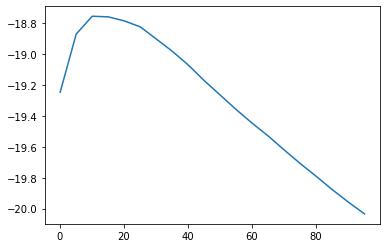

In [49]:
#choosing the best alpha
alpha=[]
error=[]
for i in range(1,1000,50):
    alpha.append(i/10)
    lrr=Ridge(alpha=(i/10))
    error.append(np.mean(cross_val_score(lrr, scaled_X_train, y_train, scoring='neg_mean_absolute_error',
                                         cv=5)))
plt.plot(alpha,error) 
plt.show()

In [50]:
#choosing the best alpha (look figure where alpha start to saturate)
lrr=Ridge(alpha=10)
lrr.fit(X_train, y_train)


Ridge(alpha=10)

In [51]:
#Printing the R2 score of test and train set 
print(f'R2 Score of training set with alpha 40 {lrr.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set with alpha 40 {lrr.score(scaled_X_test, y_test)}')

R2 Score of training set with alpha 40 0.24239976912676398
R2 Score of testing set with alpha 40 0.3018575249435965


#### Create a cross-valiation with five folds.

In [52]:
#score of training set using cross_val_score
cross_val_score(lr_r, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-20.50322637, -20.67679948, -17.5815936 ])

In [53]:
#score of training set using cross_val_score
lrr_r2=np.mean(cross_val_score(lrr, scaled_X_train, y_train, cv=5))
print(f'The R2 of Ridge Regression with alpha 10 is {lrr_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lrr_mse=np.mean(cross_val_score(lr_r, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lrr_rmse=np.sqrt(-(lrr_mse))
print(f'The mean squared error of Ridge Regression with alpha 10 is {lrr_rmse}')

#mean absolute error
lrr_mae=np.mean(cross_val_score(lr_r, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lrr_mae=(-(lrr_mae))
print(f'The mean absolute error of Ridge Regression with alpha 10 is {lrr_mae}')

The R2 of Ridge Regression with alpha 10 is 0.18776344398862516
The mean squared error of Ridge Regression with alpha 10 is 24.931466001870678
The mean absolute error of Ridge Regression with alpha 10 is 19.14386047389361


## Laso Regression

In [54]:
#using lassoregression(lasso make some features going to exactly zero)
#alpha=0 no regularization( all features are used)
# Make a lasso regression instance
lr_l=Lasso()
lr_l.fit(scaled_X_train, y_train)


Lasso()

In [55]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {lr_l.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set  {lr_l.score(scaled_X_test, y_test)}')

R2 Score of training set 0.41131352130776966
R2 Score of testing set  0.4284004894943124


#### Create a cross-valiation with five folds.

In [56]:
#score of training set using cross_val_score
cross_val_score(lr_l, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-19.14988726, -18.41962506, -17.39016643])

In [57]:
#score of training set using cross_val_score
lr_l_r2=np.mean(cross_val_score(lr_l, scaled_X_train, y_train, cv=2))
print(f'The R2 of Lasso Regression is {lr_l_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lr_l_mse=np.mean(cross_val_score(lr_l, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lr_l_rmse=np.sqrt(-(lr_l_mse))
print(f'The mean squared error of Lasso Regression is {lr_l_rmse}')

#mean absolute error
lr_l_mae=np.mean(cross_val_score(lr_l, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lr_l_mae=(-(lr_l_mae))
print(f'The mean absolute error of Lasso Regression is {lr_l_mae}')

The R2 of Lasso Regression is 0.34186062297133285
The mean squared error of Lasso Regression is 24.638206292946744
The mean absolute error of Lasso Regression is 18.85188697019579


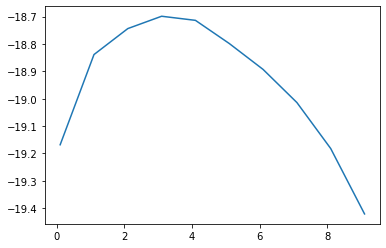

In [58]:
#choosing the best alpha
alpha=[]
error=[]
for i in range(1,100,10):
    alpha.append(i/10)
    lrl=Lasso(alpha=(i/10))
    error.append(np.mean(cross_val_score(lrl, scaled_X_train, y_train, scoring='neg_mean_absolute_error',
                                         cv=5)))
plt.plot(alpha,error)
plt.show()

In [59]:
#choosing the best alpha
lrl=Lasso(alpha=10)
lrl.fit(scaled_X_train, y_train)


Lasso(alpha=10)

In [60]:
#Printing the R2 score of test and train set 
print(f'R2 Score of training set with alpha 10 {lrl.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set with alpha 10 {lrl.score(scaled_X_test, y_test)}')

R2 Score of training set with alpha 10 0.30267850496357285
R2 Score of testing set with alpha 10 0.28237914152090693


#### Create a cross-valiation with five folds.

In [61]:
#score of training set using cross_val_score
cross_val_score(lr_l, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-19.14988726, -18.41962506, -17.39016643])

In [62]:
#score of training set using cross_val_score
lrl_r2=np.mean(cross_val_score(lrl, scaled_X_train, y_train, cv=5))
print(f'The R2 of Lasso Regression with alpha 10 is {lrl_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
lrl_mse=np.mean(cross_val_score(lr_l, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
lrl_rmse=np.sqrt(-(lrl_mse))
print(f'The mean squared error of Lasso Regression with alpha 10 is {lrl_rmse}')

#mean absolute error
lrl_mae=np.mean(cross_val_score(lr_l, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
lrl_mae=(-(lrl_mae))
print(f'The mean absolute error of Lasso Regressionwith alpha 10 is {lrl_mae}')

The R2 of Lasso Regression with alpha 10 is 0.18568445085525576
The mean squared error of Lasso Regression with alpha 10 is 24.638206292946744
The mean absolute error of Lasso Regressionwith alpha 10 is 18.85188697019579


## Support Vector Machine(SVM) Regression

In [63]:
# Make a svm regression instance
svm=LinearSVR(epsilon=1.5)
svm.fit(scaled_X_train, y_train)


LinearSVR(epsilon=1.5)

In [64]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {svm.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set  {svm.score(scaled_X_test, y_test)}')

R2 Score of training set -0.05958886889452253
R2 Score of testing set  0.04367542106815869


#### Create a cross-valiation with five folds.

In [65]:
#score of training set using cross_val_score
cross_val_score(svm, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-30.73798013, -23.17440722, -32.07160472])

In [66]:
#score of training set using cross_val_score
svm_r2=np.mean(cross_val_score(svm, scaled_X_train, y_train, cv=5))
print(f'The R2 of svm Regression is {svm_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
svm_mse=np.mean(cross_val_score(svm, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
svm_rmse=np.sqrt(-(svm_mse))
print(f'The mean squared error of svm Regression is {svm_rmse}')

#mean absolute error
svm_mae=np.mean(cross_val_score(svm, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
svm_mae=(-(svm_mae))
print(f'The mean absolute error of svm Regression is {svm_mae}')

The R2 of svm Regression is -0.5325004165170775
The mean squared error of svm Regression is 35.634718309384596
The mean absolute error of svm Regression is 26.841870318590697


## Support Vector Machine(SVR) Kernel Regression

In [67]:
# Make a svm regression instance
svr=SVR(kernel='linear')
svr.fit(scaled_X_train, y_train)


SVR(kernel='linear')

In [68]:
#Printing the R2 score of test and train set
print(f'R2 Score of training set {svr.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set  {svr.score(scaled_X_test, y_test)}')

R2 Score of training set 0.37363925541273124
R2 Score of testing set  0.3209092134215076


#### Create a cross-valiation with five folds.

In [69]:
#score of training set using cross_val_score
cross_val_score(svr, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-19.31059148, -19.7592752 , -18.65774348])

In [70]:
#score of training set using cross_val_score
svr_r2=np.mean(cross_val_score(svr, scaled_X_train, y_train, cv=5))
print(f'The R2 of svr is {svr_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
svr_mse=np.mean(cross_val_score(svr, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
svr_rmse=np.sqrt(-(svr_mse))
print(f'The mean squared error of svr is {svr_rmse}')

#mean absolute error
svr_mae=np.mean(cross_val_score(svr, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
svr_mae=(-(svr_mae))
print(f'The mean absolute error of svr  is {svr_mae}')

The R2 of svr is 0.18020947869994428
The mean squared error of svr is 26.14717990102985
The mean absolute error of svr  is 19.75985893737263


## Decision Tree

In [71]:
# Make a decision tree instance
dt=DecisionTreeRegressor()
dt.fit(scaled_X_train, y_train)

DecisionTreeRegressor()

In [72]:
#Printing the score of test and train set
print(f'R2 Score of training set {dt.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set  {dt.score(scaled_X_test, y_test)}')

R2 Score of training set 1.0
R2 Score of testing set  0.3417395165609749


#### Create a cross-valiation with five folds.

In [73]:
#score of training set using cross_val_score
cross_val_score(dt, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-19.3243898 , -31.42643934, -14.05745037])

In [74]:
#score of training set using cross_val_score
dt_r2=np.mean(cross_val_score(dt, scaled_X_train, y_train, cv=5))
print(f'The R2 of Decision Tree Regressor is {dt_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
dt_mse=np.mean(cross_val_score(dt, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
dt_rmse=np.sqrt(-(dt_mse))
print(f'The mean squared error of Decision Tree Regressor is {dt_rmse}')

#mean absolute error
dt_mae=np.mean(cross_val_score(dt, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
dt_mae=(-(dt_mae))
print(f'The mean absolute error of Decision Tree Regressor is {dt_mae}')

The R2 of Decision Tree Regressor is -0.03660918768953416
The mean squared error of Decision Tree Regressor is 24.99474265425015
The mean absolute error of Decision Tree Regressor is 17.869733863784536


### Tuning hyperparamaters  using Grid Search CV

In [75]:
parameters = {
              'max_depth':[6, 8,12],
              'min_samples_leaf':range(1,5)}
gs_dt=GridSearchCV(dt, param_grid=parameters, 
                    cv=3, verbose=1, n_jobs=-1)
gs_dt.fit(scaled_X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 12],
                         'min_samples_leaf': range(1, 5)},
             verbose=1)

In [76]:
#Best parameters
gs_dt.best_params_

{'max_depth': 12, 'min_samples_leaf': 1}

In [77]:
#best estimator
dt_b=gs_dt.best_estimator_
dt_b

DecisionTreeRegressor(max_depth=12)

In [78]:
#Printing the score of test and train set
dt_tr=dt_b.score(scaled_X_train, y_train)
dt_te=dt_b.score(scaled_X_test, y_test)
print(f'R2 Score of training set after hyperpar tuining {dt_tr}')
print(f'R2 Score of testing set after hyperpar tuining  {dt_te}')

R2 Score of training set after hyperpar tuining 1.0
R2 Score of testing set after hyperpar tuining  0.3478796152525635


In [79]:
#dataframe for results
dt_df=pd.DataFrame(gs_dt.cv_results_)
dt_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000749,0.000022,0.000532,0.000010,6,1,"{'max_depth': 6, 'min_samples_leaf': 1}",0.217841,-0.217020,0.568761,0.189861,0.321403,3
1,0.000700,0.000009,0.000479,0.000010,6,2,"{'max_depth': 6, 'min_samples_leaf': 2}",0.280604,-0.274608,0.599297,0.201765,0.361100,2
2,0.000937,0.000314,0.000632,0.000171,6,3,"{'max_depth': 6, 'min_samples_leaf': 3}",0.363173,-0.468052,0.436243,0.110455,0.410152,11
3,0.000787,0.000009,0.001757,0.001572,6,4,"{'max_depth': 6, 'min_samples_leaf': 4}",0.498626,-0.286714,0.339900,0.183937,0.339051,5
4,0.000796,0.000053,0.000708,0.000081,8,1,"{'max_depth': 8, 'min_samples_leaf': 1}",0.255125,-0.451923,0.551447,0.118216,0.420909,10
5,0.000739,0.000043,0.000598,0.000033,8,2,"{'max_depth': 8, 'min_samples_leaf': 2}",0.293238,-0.785720,0.616858,0.041459,0.599639,12
6,0.000713,0.000023,0.000558,0.000080,8,3,"{'max_depth': 8, 'min_samples_leaf': 3}",0.442840,-0.468052,0.436243,0.137011,0.427852,8
7,0.000624,0.000075,0.000594,0.000046,8,4,"{'max_depth': 8, 'min_samples_leaf': 4}",0.498626,-0.286714,0.213057,0.141656,0.324565,7
8,0.000655,0.000036,0.000487,0.000021,12,1,"{'max_depth': 12, 'min_samples_leaf': 1}",0.241627,-0.123625,0.554142,0.224048,0.276976,1
9,0.000719,0.000068,0.000526,0.000113,12,2,"{'max_depth': 12, 'min_samples_leaf': 2}",0.251866,-0.279232,0.583514,0.185383,0.355338,4


In [80]:
#printing the evaluation scores
cvres_dt=gs_dt.cv_results_
for mean_score, params in zip(cvres_dt['mean_test_score'], cvres_dt['params']):
    print((mean_score), params)

0.18986059375545886 {'max_depth': 6, 'min_samples_leaf': 1}
0.20176455097848237 {'max_depth': 6, 'min_samples_leaf': 2}
0.11045472665788218 {'max_depth': 6, 'min_samples_leaf': 3}
0.1839372892235078 {'max_depth': 6, 'min_samples_leaf': 4}
0.11821623342222598 {'max_depth': 8, 'min_samples_leaf': 1}
0.04145862576442483 {'max_depth': 8, 'min_samples_leaf': 2}
0.13701056916507906 {'max_depth': 8, 'min_samples_leaf': 3}
0.14165628064887134 {'max_depth': 8, 'min_samples_leaf': 4}
0.22404812723126713 {'max_depth': 12, 'min_samples_leaf': 1}
0.18538271339826162 {'max_depth': 12, 'min_samples_leaf': 2}
0.1350721772670536 {'max_depth': 12, 'min_samples_leaf': 3}
0.17890402392013394 {'max_depth': 12, 'min_samples_leaf': 4}


## Random Forest

In [81]:
# Make a Random forest instance
rf=RandomForestRegressor()
rf.fit(scaled_X_train, y_train)

RandomForestRegressor()

In [82]:
#Printing the score of test and train set
print(f'R2 Score of training set {rf.score(scaled_X_train, y_train)}')
print(f'R2 Score of testing set {rf.score(scaled_X_test, y_test)}')

R2 Score of training set 0.9380496952451699
R2 Score of testing set 0.6056401839234891


#### Create a cross-valiation with five folds.

In [83]:
#score of training set using cross_val_score
cross_val_score(rf, scaled_X_train, y_train, scoring='neg_mean_absolute_error', cv=3)

array([-17.16111618, -18.50655145, -14.08799218])

In [84]:
#score of training set using cross_val_score
rf_r2=np.mean(cross_val_score(rf, scaled_X_train, y_train, cv=5))
print(f'The R2 of Random Forest Regressor is {rf_r2}')

#cross validation features gives greater is better, so score function is opposite of 
#MSE so we need to use -ve to get mse
rf_mse=np.mean(cross_val_score(rf, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
rf_rmse=np.sqrt(-(lrl_mse))
print(f'The mean squared error of Random Forest Regressor is {rf_rmse}')

#mean absolute error
rf_mae=np.mean(cross_val_score(rf, scaled_X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
rf_mae=(-(rf_mae))
print(f'The mean absolute error of Random Forest Regressor is {rf_mae}')

The R2 of Random Forest Regressor is 0.46974248636035254
The mean squared error of Random Forest Regressor is 24.638206292946744
The mean absolute error of Random Forest Regressor is 14.573666668081085


#### Tuning the hyperparameters using Grid Search CV

In [85]:
parameters = [{'n_estimators':[30,60,100],
              'max_features':[3,6]}]
              #,{'bootstrap':[False], 'n_estimators':[3,10,100],
              #'max_features':[4,6,8,10]}]
gs_rf=GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error',
                   cv=5, return_train_score=True)
gs_rf.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [3, 6],
                          'n_estimators': [30, 60, 100]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [86]:
#Best parameters
gs_rf.best_params_

{'max_features': 3, 'n_estimators': 100}

In [87]:
#best estimator
rf_b=gs_rf.best_estimator_
rf_b

RandomForestRegressor(max_features=3)

In [88]:
#Printing the score of test and train set
rf_tr=rf_b.score(scaled_X_train, y_train)
rf_te=rf_b.score(scaled_X_test, y_test)
print(f'R2 Score of training set after hyperpar tuining {rf_tr}')
print(f'R2 Score of testing set after hyperpar tuining  {rf_te}')

R2 Score of training set after hyperpar tuining 0.9356867390619986
R2 Score of testing set after hyperpar tuining  0.54573606731663


In [89]:
#dataframe for results
rf_df=pd.DataFrame(gs_rf.cv_results_)
rf_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025552,0.003154,0.001940,0.000160,3,30,"{'max_features': 3, 'n_estimators': 30}",-16.064769,-16.443075,-14.208305,...,-14.919058,3.300008,2,-6.273037,-5.810010,-6.229800,-5.155168,-6.888791,-6.071361,0.573006
1,0.043017,0.001749,0.003308,0.000288,3,60,"{'max_features': 3, 'n_estimators': 60}",-16.233474,-16.370051,-13.354247,...,-15.100755,3.739269,3,-6.093949,-6.112953,-6.535710,-5.121629,-6.005463,-5.973941,0.464056
2,0.075832,0.006663,0.005565,0.000775,3,100,"{'max_features': 3, 'n_estimators': 100}",-15.627851,-14.832838,-13.120575,...,-14.387500,3.197744,1,-5.825398,-6.049383,-6.331998,-5.051963,-6.188825,-5.889513,0.450897
3,0.007940,0.000853,0.000000,0.000000,6,30,"{'max_features': 6, 'n_estimators': 30}",NaN,NaN,NaN,...,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.016167,0.002460,0.000000,0.000000,6,60,"{'max_features': 6, 'n_estimators': 60}",NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.024965,0.003176,0.000000,0.000000,6,100,"{'max_features': 6, 'n_estimators': 100}",NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
#printing the evaluation scores
cvres=gs_rf.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print((-mean_score), params)

14.919057772183939 {'max_features': 3, 'n_estimators': 30}
15.100755248979704 {'max_features': 3, 'n_estimators': 60}
14.387499904672396 {'max_features': 3, 'n_estimators': 100}
nan {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 6, 'n_estimators': 60}
nan {'max_features': 6, 'n_estimators': 100}


### Important scores of each columns

In [91]:
feature_importances=rf_b.feature_importances_
col=X.columns
sorted(zip(feature_importances, col), reverse=True)

[(0.40610574179812037, 'Age_Group'),
 (0.24897802952547357, 'O3 AQI_mean'),
 (0.2022576866203598, 'O3 AQI_max'),
 (0.1426585420560462, 'O3 AQI_min')]

## Predicting on Test set

In [92]:
#Testing the model in test data
y_pred_lr=lr.predict(scaled_X_test)     #linear 
y_pred_lrl=lrl.predict(scaled_X_test)   #lasso
y_pred_lrr=lrr.predict(scaled_X_test)   #Ridge
y_pred_svm=svm.predict(scaled_X_test)   #svm
y_pred_dt=dt_b.predict(scaled_X_test)   #Dicision tree
y_pred_rf=rf_b.predict(scaled_X_test)   #Random forest

### R2_score

In [93]:
#regression matrices-mean absolute error(give you the prediction error)
lin_r2_lr=r2_score(y_test, y_pred_lr)
print(f'The r2_score of linear regression is {lin_r2_lr}')

lin_r2_lrl=r2_score(y_test, y_pred_lrl)
print(f'The r2_score of lasso regression is {lin_r2_lrl}')

lin_r2_lrr=r2_score(y_test, y_pred_lrr)
print(f'The r2_score of Ridge regression is {lin_r2_lrr}')

lin_r2_svm=r2_score(y_test, y_pred_svm)
print(f'The r2_score of SVM regression is {lin_r2_svm}')

lin_r2_dt=r2_score(y_test, y_pred_dt)
print(f'The r2_score of decision tree regression is {lin_r2_dt}')

lin_r2_rf=r2_score(y_test, y_pred_rf)
print(f'The r2_score of random forest regression is {lin_r2_rf}')


The r2_score of linear regression is 0.4373255461236534
The r2_score of lasso regression is 0.28237914152090693
The r2_score of Ridge regression is 0.3018575249435965
The r2_score of SVM regression is 0.04367542106815869
The r2_score of decision tree regression is 0.3478796152525635
The r2_score of random forest regression is 0.54573606731663


### Mean Absolute Error

In [94]:
#regression matrices-mean absolute error(give you the prediction error)
lin_mae_lr=mean_absolute_error(y_test, y_pred_lr)
print(f'The mean absoulte error of linear regression is {lin_mae_lr}')

lin_mae_lrl=mean_absolute_error(y_test, y_pred_lrl)
print(f'The mean absoulte error of lasso regression is {lin_mae_lrl}')

lin_mae_lrr=mean_absolute_error(y_test, y_pred_lrr)
print(f'The mean absoulte error of Ridge regression is {lin_mae_lrr}')

lin_mae_svm=mean_absolute_error(y_test, y_pred_svm)
print(f'The mean absoulte error of SVM regression is {lin_mae_svm}')

lin_mae_dt=mean_absolute_error(y_test, y_pred_dt)
print(f'The mean absoulte error of decision tree regression is {lin_mae_dt}')

lin_mae_rf=mean_absolute_error(y_test, y_pred_rf)
print(f'The mean absoulte error of random forest regression is {lin_mae_rf}')


The mean absoulte error of linear regression is 19.391147505256715
The mean absoulte error of lasso regression is 22.30432768732225
The mean absoulte error of Ridge regression is 23.093487458548214
The mean absoulte error of SVM regression is 25.423647069349098
The mean absoulte error of decision tree regression is 18.80018473959426
The mean absoulte error of random forest regression is 16.69015455083371


### Root Mean Squared Error

In [95]:
#regression matrices-mean squared error(give you the prediction error)
lin_mse_lr=mean_squared_error(y_test, y_pred_lr)
lin_rmse_lr=np.sqrt(lin_mse_lr)
print(f'The mean squared error of linear regression is {lin_rmse_lr}')

lin_mse_lrl=mean_squared_error(y_test, y_pred_lrl)
lin_rmse_lrl=np.sqrt(lin_mse_lrl)
print(f'The mean squared error of lasso regression is {lin_rmse_lrl}')

lin_mse_lrr=mean_squared_error(y_test, y_pred_lrr)
lin_rmse_lrr=np.sqrt(lin_mse_lrr)
print(f'The mean squared error of ridge regression is {lin_rmse_lrr}')

lin_mse_svm=mean_squared_error(y_test, y_pred_svm)
lin_rmse_svm=np.sqrt(lin_mse_svm)
print(f'The mean squared error of SVM regression is {lin_rmse_svm}')

lin_mse_dt=mean_squared_error(y_test, y_pred_dt)
lin_rmse_dt=np.sqrt(lin_mse_dt)
print(f'The mean squared error of decision tree regression is {lin_rmse_dt}')

lin_mse_rf=mean_squared_error(y_test, y_pred_rf)
lin_rmse_rf=np.sqrt(lin_mse_rf)
print(f'The mean squared error of random forest regression is {lin_rmse_rf}')

The mean squared error of linear regression is 27.22371558333459
The mean squared error of lasso regression is 30.74442156940809
The mean squared error of ridge regression is 30.324303211972286
The mean squared error of SVM regression is 35.491263348255806
The mean squared error of decision tree regression is 29.307764144604544
The mean squared error of random forest regression is 24.46092792779027


### Actual and predicted 

In [96]:
#Actual and predicated value of house using our best model
asthma_value=pd.DataFrame({'Actual Value of Age_Adjusted_Rate':y_test, 
                'Random Forest Predicted Age_Adjusted_Rate':y_pred_rf,
                'Linear Reg Predicted Age_Adjusted_Rate':y_pred_lr,
                'Lasso Reg Predicted Age_Adjusted_Rate':y_pred_lrl,
                'Ridge Reg Predicted Age_Adjusted_Rate':y_pred_lrr,       
                'Decesion Tree Predicted Age_Adjusted_Rate':y_pred_dt,
                 'SVM Predicted Age_Adjusted_Rate':y_pred_svm})
asthma_value

,Actual Value of Age_Adjusted_Rate,Random Forest Predicted Age_Adjusted_Rate,Linear Reg Predicted Age_Adjusted_Rate,Lasso Reg Predicted Age_Adjusted_Rate,Ridge Reg Predicted Age_Adjusted_Rate,Decesion Tree Predicted Age_Adjusted_Rate,SVM Predicted Age_Adjusted_Rate
0,46.005882,51.784548,46.642998,56.997428,29.555552,54.906061,32.494000
1,142.950000,100.705527,84.324619,75.909883,81.729036,141.000000,64.647370
2,52.825000,48.316266,45.219743,56.997428,29.196745,63.265116,38.987784
3,42.671053,91.513185,87.489405,75.909883,82.328058,101.470000,56.004045
4,95.936111,79.086259,87.962298,75.909883,82.315633,64.840000,59.198269
5,143.500000,81.447541,84.522772,75.909883,81.516654,84.537778,65.707796
6,62.400000,69.784682,86.542415,75.909883,81.709667,61.340000,61.915686
7,90.216279,92.326348,85.973013,75.909883,81.753325,86.887234,67.779266
8,38.738760,38.345016,46.845702,56.997428,29.401915,54.906061,34.823401
9,55.506522,56.253395,48.429835,56.997428,29.759932,53.652273,28.612766


In [97]:
asthma_value.to_html('asthma_pred.html')

## Evaluation metrices of differnt models

In [68]:
#making dataframe on evaluation metrices
evaluation_df=pd.DataFrame({'Linear Reg':[lin_r2_lr,lin_mae_lr,lin_rmse_lr],
                           'Lasso Reg':[lin_r2_lrl,lin_mae_lrl,lin_rmse_lrl],
                            'Ridge Reg':[lin_r2_lrr,lin_mae_lrr,lin_rmse_lrr],
                            'SVM Reg':[lin_r2_svm,lin_mae_svm,lin_rmse_svm],
                           'Decision Tree':[lin_r2_dt,lin_mae_dt,lin_rmse_dt],
                            'Random Forest':[lin_r2_rf,lin_mae_rf,lin_rmse_rf]}
                           ,index=['R2','Mean Absolute Error',
                                    'Root Mean Squared Error'])
evaluation_df

,Linear Reg,Lasso Reg,Ridge Reg,SVM Reg,Decision Tree,Random Forest
R2,0.437326,0.282379,0.301858,0.043579,0.409980,0.583515
Mean Absolute Error,19.391148,22.304328,23.093487,25.424080,17.709624,16.900970
Root Mean Squared Error,27.223716,30.744422,30.324303,35.493059,27.877402,23.421717


## Saving the best model

In [69]:
import joblib
joblib.dump(rf_b, 'model_asthma.pkl')

['model_asthma.pkl']

In [70]:
#saving standard scaler
joblib.dump(std_scaler, 'scaler_asthma.pkl')

['scaler_asthma.pkl']